In [1]:
import numpy as np
from scipy import stats
import covariance_emulator
import covariance_breakdown as cb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covs = np.load("gaussian_xipgammaw_sub_covs_withcut.npy")

In [3]:
c = covs[-1]
#covs = covs[:-1]

1.651153e+08


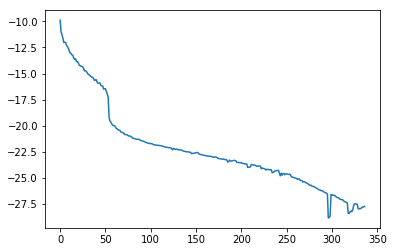

In [4]:
w1, v1 = np.linalg.eig(c)
print("%e"%(max(w1)/min(w1)))
#w2, v2 = np.linalg.eig(c2)
#print("%e"%(max(w2)/min(w2)))

plt.plot(np.log(w1))
#plt.plot(np.log(w2), "--")

In [5]:
Nc = len(covs)
ND = len(c[0])
NL = int(ND*(ND-1)/2)
print(ND,NL)
Ds = np.zeros((Nc, ND))
Lps = np.zeros((Nc, NL))
for i in range(Nc):
    b = cb.breakdown(covs[i], unravel_diagonally=True)
    Ds[i] = b.D
    Lps[i] = b.Lprime

(337, 56616)


In [12]:
lnDs = np.log(Ds)
lnDm = np.mean(lnDs, 0)
print(lnDm.shape)
lnDsig = np.std(lnDs)
lDs = (lnDs - lnDm)/lnDsig

Lpm = np.mean(Lps)
Lpsig = np.std(Lps)
LP = (Lps-Lpm)/Lpsig
uL, sL, vL = np.linalg.svd(LP, 0)

(337,)


In [7]:
#Define a function to reconstruct matrix i after the PCA
def get_ci(i):
    z = np.zeros(Nc)
    print(lDs.shape)
    uD, sD, vD = np.linalg.svd(lDs)
    sD = np.diag(sD)
    for ind in range(Nc, len(vD)):
        sD = np.vstack((sD,z))
        #print(sD.shape)
    sD = sD.T
    print(uD.shape, sD.shape, vD.shape)
    rlDs = np.dot(uD, np.dot(sD, vD))
    rDs = np.exp(rlDs * lnDsig + lnDm)
    print(LP.shape)

    uL, sL, vL = np.linalg.svd(LP, 0)
    print(uL.shape, sL.shape, vL.shape)
    sL = np.diag(sL)
    print(uL.shape, sL.shape, vL.shape)
    rLL = np.dot(uL, np.dot(sL, vL))
    rLP = rLL * Lpsig + Lpm
    Di = rDs[i]
    Lpi = rLP[i]
    print(Di.shape, Lpi.shape)
    rb = cb.breakdown.from_D_Lprime(Di, Lpi, True)
    return rb.C

(25, 337)
((25, 25), (25, 337), (337, 337))
(25, 56616)
((25, 25), (25,), (25, 56616))
((25, 25), (25, 25), (25, 56616))
((337,), (56616,))
1.651153e+08
1.651153e+08


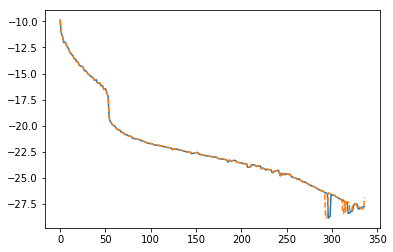

In [9]:
c = covs[-1]
c2 = get_ci(-1)
w1, v1 = np.linalg.eig(c)
print("%e"%(max(w1)/min(w1)))
w2, v2 = np.linalg.eig(c2)
print("%e"%(max(w2)/min(w2)))

plt.plot(np.log(w1))
plt.plot(np.log(w2), "--")